epochs : 0
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 217us/step - loss: 2.2820 - accuracy: 0.1429 - val_loss: 2.2225 - val_accuracy: 0.2633
epochs : 1
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 158us/step - loss: 2.1802 - accuracy: 0.2386 - val_loss: 2.1340 - val_accuracy: 0.3100
epochs : 2
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 157us/step - loss: 2.1054 - accuracy: 0.2900 - val_loss: 2.0729 - val_accuracy: 0.3400
epochs : 3
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 171us/step - loss: 2.0454 - accuracy: 0.3286 - val_loss: 2.0229 - val_accuracy: 0.3133
epochs : 4
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 246us/step - loss: 1.9943 - accuracy: 0.3443 - val_loss: 1.9749 - val_accuracy: 0.3100


epochs : 41
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 137us/step - loss: 1.3762 - accuracy: 0.4743 - val_loss: 1.5063 - val_accuracy: 0.4000
epochs : 42
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 129us/step - loss: 1.3725 - accuracy: 0.4600 - val_loss: 1.4976 - val_accuracy: 0.4133
epochs : 43
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 128us/step - loss: 1.3619 - accuracy: 0.4786 - val_loss: 1.5042 - val_accuracy: 0.4033
epochs : 44
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 154us/step - loss: 1.3609 - accuracy: 0.4743 - val_loss: 1.4951 - val_accuracy: 0.4033
epochs : 45
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 157us/step - loss: 1.3548 - accuracy: 0.4757 - val_loss: 1.4899 - val_accuracy: 0.

epochs : 82
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 323us/step - loss: 1.2145 - accuracy: 0.5400 - val_loss: 1.4411 - val_accuracy: 0.4400
epochs : 83
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 179us/step - loss: 1.2127 - accuracy: 0.5443 - val_loss: 1.4446 - val_accuracy: 0.4500
epochs : 84
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 184us/step - loss: 1.2081 - accuracy: 0.5429 - val_loss: 1.4400 - val_accuracy: 0.4467
epochs : 85
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 264us/step - loss: 1.2075 - accuracy: 0.5443 - val_loss: 1.4412 - val_accuracy: 0.4600
epochs : 86
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 224us/step - loss: 1.2046 - accuracy: 0.5486 - val_loss: 1.4414 - val_accuracy: 0.

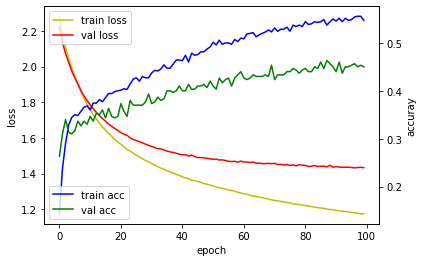

In [2]:
import keras

# 사용자 정의 히스토리 클래스 정의
class CustomHistory(keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []        
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))
    
# 모델 학습시키기

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기

custom_hist = CustomHistory()
custom_hist.init()

for epoch_idx in range(100):
    print ('epochs : ' + str(epoch_idx) )
    model.fit(X_train, Y_train, epochs=1, batch_size=10, validation_data=(X_val, Y_val), callbacks=[custom_hist])

# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(custom_hist.train_loss, 'y', label='train loss')
loss_ax.plot(custom_hist.val_loss, 'r', label='val loss')

acc_ax.plot(custom_hist.train_acc, 'b', label='train acc')
acc_ax.plot(custom_hist.val_acc, 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()